In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

params="GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,RACE_GROUP_LABEL,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F"
params="EMPSZFI,EMPSZFI_LABEL,EMP"
location="us:*"
key="b2c289dbb192d92ff73949ae8d4157f0731334e5"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"


full_list=json.loads(requests.get(url).text)

full_list

[['EMPSZFI', 'EMPSZFI_LABEL', 'EMP', 'us'],
 ['001', 'All firms', '128196406', '1'],
 ['611', 'Firms with no employees', '0', '1'],
 ['612', 'Firms with 1 to 4 employees', '5612254', '1'],
 ['620', 'Firms with 5 to 9 employees', '6265576', '1'],
 ['630', 'Firms with 10 to 19 employees', '8242749', '1'],
 ['641', 'Firms with 20 to 49 employees', '12161051', '1'],
 ['642', 'Firms with 50 to 99 employees', '8533853', '1'],
 ['651', 'Firms with 100 to 249 employees', '10657260', '1'],
 ['652', 'Firms with 250 to 499 employees', '7491988', '1'],
 ['657', 'Firms with 500 employees or more', '69231676', '1']]

In [2]:
headers = full_list.pop(0)
full_list.pop(0)
print(headers)
print(full_list)

df = pd.DataFrame(full_list, columns=headers)
df.head()



['EMPSZFI', 'EMPSZFI_LABEL', 'EMP', 'us']
[['611', 'Firms with no employees', '0', '1'], ['612', 'Firms with 1 to 4 employees', '5612254', '1'], ['620', 'Firms with 5 to 9 employees', '6265576', '1'], ['630', 'Firms with 10 to 19 employees', '8242749', '1'], ['641', 'Firms with 20 to 49 employees', '12161051', '1'], ['642', 'Firms with 50 to 99 employees', '8533853', '1'], ['651', 'Firms with 100 to 249 employees', '10657260', '1'], ['652', 'Firms with 250 to 499 employees', '7491988', '1'], ['657', 'Firms with 500 employees or more', '69231676', '1']]


,EMPSZFI,EMPSZFI_LABEL,EMP,us
0,611,Firms with no employees,0,1
1,612,Firms with 1 to 4 employees,5612254,1
2,620,Firms with 5 to 9 employees,6265576,1
3,630,Firms with 10 to 19 employees,8242749,1
4,641,Firms with 20 to 49 employees,12161051,1


In [3]:
df

,EMPSZFI,EMPSZFI_LABEL,EMP,us
0,611,Firms with no employees,0,1
1,612,Firms with 1 to 4 employees,5612254,1
2,620,Firms with 5 to 9 employees,6265576,1
3,630,Firms with 10 to 19 employees,8242749,1
4,641,Firms with 20 to 49 employees,12161051,1
5,642,Firms with 50 to 99 employees,8533853,1
6,651,Firms with 100 to 249 employees,10657260,1
7,652,Firms with 250 to 499 employees,7491988,1
8,657,Firms with 500 employees or more,69231676,1


In [4]:
pd.options.mode.chained_assignment = None

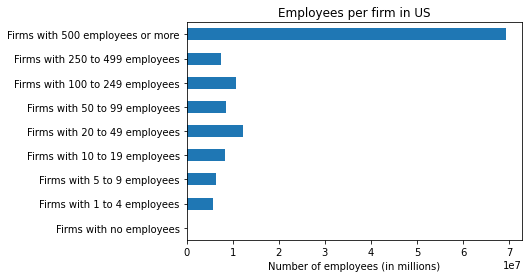

In [5]:
emps = df[['EMP', 'EMPSZFI_LABEL']]
emps['EMP'] = pd.to_numeric(emps['EMP'])
emps.set_index("EMPSZFI_LABEL",drop=True,inplace=True)
ax = emps.plot(title = 'Employees per firm in US',kind='barh', legend=False)
ax.set_xlabel('Number of employees (in millions)')
ax.set_ylabel('')
plt.show()


In [6]:
url="https://api.census.gov/data/2018/abscs?get=EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,RCPPDEMP_F&for=us:*&key=b2c289dbb192d92ff73949ae8d4157f0731334e5"


data=json.loads(requests.get(url).text)

data

[['EMPSZFI', 'EMPSZFI_LABEL', 'RCPPDEMP', 'RCPPDEMP_F', 'us'],
 ['001', 'All firms', '38405539368', None, '1'],
 ['611', 'Firms with no employees', '325046053', None, '1'],
 ['612', 'Firms with 1 to 4 employees', '1247506977', None, '1'],
 ['620', 'Firms with 5 to 9 employees', '1071154479', None, '1'],
 ['630', 'Firms with 10 to 19 employees', '1397607709', None, '1'],
 ['641', 'Firms with 20 to 49 employees', '2421677332', None, '1'],
 ['642', 'Firms with 50 to 99 employees', '2212008509', None, '1'],
 ['651', 'Firms with 100 to 249 employees', '3208386734', None, '1'],
 ['652', 'Firms with 250 to 499 employees', '2178757220', None, '1'],
 ['657', 'Firms with 500 employees or more', '24343394355', None, '1']]

In [7]:
headers = data.pop(0)
data.pop(0)
print(headers)
print(data)

df_1 = pd.DataFrame(data, columns=headers)
df_1.head()

['EMPSZFI', 'EMPSZFI_LABEL', 'RCPPDEMP', 'RCPPDEMP_F', 'us']
[['611', 'Firms with no employees', '325046053', None, '1'], ['612', 'Firms with 1 to 4 employees', '1247506977', None, '1'], ['620', 'Firms with 5 to 9 employees', '1071154479', None, '1'], ['630', 'Firms with 10 to 19 employees', '1397607709', None, '1'], ['641', 'Firms with 20 to 49 employees', '2421677332', None, '1'], ['642', 'Firms with 50 to 99 employees', '2212008509', None, '1'], ['651', 'Firms with 100 to 249 employees', '3208386734', None, '1'], ['652', 'Firms with 250 to 499 employees', '2178757220', None, '1'], ['657', 'Firms with 500 employees or more', '24343394355', None, '1']]


,EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,RCPPDEMP_F,us
0,611,Firms with no employees,325046053,None,1
1,612,Firms with 1 to 4 employees,1247506977,None,1
2,620,Firms with 5 to 9 employees,1071154479,None,1
3,630,Firms with 10 to 19 employees,1397607709,None,1
4,641,Firms with 20 to 49 employees,2421677332,None,1


In [8]:
df_1

,EMPSZFI,EMPSZFI_LABEL,RCPPDEMP,RCPPDEMP_F,us
0,611,Firms with no employees,325046053,None,1
1,612,Firms with 1 to 4 employees,1247506977,None,1
2,620,Firms with 5 to 9 employees,1071154479,None,1
3,630,Firms with 10 to 19 employees,1397607709,None,1
4,641,Firms with 20 to 49 employees,2421677332,None,1
5,642,Firms with 50 to 99 employees,2212008509,None,1
6,651,Firms with 100 to 249 employees,3208386734,None,1
7,652,Firms with 250 to 499 employees,2178757220,None,1
8,657,Firms with 500 employees or more,24343394355,None,1


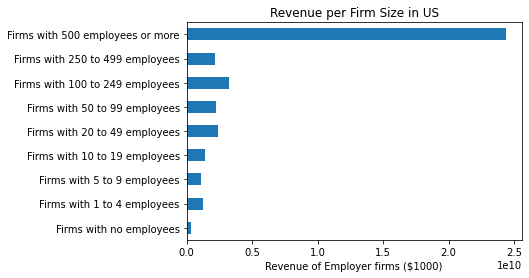

In [9]:
rev = df_1[['EMPSZFI_LABEL', 'RCPPDEMP']]
rev['RCPPDEMP'] = pd.to_numeric(rev['RCPPDEMP'])
rev.set_index("EMPSZFI_LABEL",drop=True,inplace=True)
ax = rev.plot(title = 'Revenue per Firm Size in US',kind='barh', legend=False)
ax.set_xlabel('Revenue of Employer firms ($1000)')
ax.set_ylabel('')
plt.show()

In [10]:
url = "https://api.census.gov/data/2018/abscs?get=NAME,EMP,PAYANN&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:20260,22020,24220,29100,31860,33460,40340,41060&key=b2c289dbb192d92ff73949ae8d4157f0731334e5"


data=json.loads(requests.get(url).text)

data


[['NAME',
  'EMP',
  'PAYANN',
  'metropolitan statistical area/micropolitan statistical area'],
 ['Fargo, ND-MN Metro Area', '122696', '6039315', '22020'],
 ['La Crosse-Onalaska, WI-MN Metro Area', '54834', '2520369', '29100'],
 ['Grand Forks, ND-MN Metro Area', '45462', '1723420', '24220'],
 ['Mankato-North Mankato, MN Metro Area', '53275', '2155220', '31860'],
 ['Duluth, MN-WI Metro Area', '122790', '4905570', '20260'],
 ['Minneapolis-St. Paul-Bloomington, MN-WI Metro Area',
  '1800463',
  '105932770',
  '33460'],
 ['Rochester, MN Metro Area', '110541', '6771158', '40340'],
 ['St. Cloud, MN Metro Area', '98054', '4511273', '41060']]

In [11]:
headers = data.pop(0)
print(headers)
print(data)

df_1 = pd.DataFrame(data, columns=headers)
df_1.head()

['NAME', 'EMP', 'PAYANN', 'metropolitan statistical area/micropolitan statistical area']
[['Fargo, ND-MN Metro Area', '122696', '6039315', '22020'], ['La Crosse-Onalaska, WI-MN Metro Area', '54834', '2520369', '29100'], ['Grand Forks, ND-MN Metro Area', '45462', '1723420', '24220'], ['Mankato-North Mankato, MN Metro Area', '53275', '2155220', '31860'], ['Duluth, MN-WI Metro Area', '122790', '4905570', '20260'], ['Minneapolis-St. Paul-Bloomington, MN-WI Metro Area', '1800463', '105932770', '33460'], ['Rochester, MN Metro Area', '110541', '6771158', '40340'], ['St. Cloud, MN Metro Area', '98054', '4511273', '41060']]


,NAME,EMP,PAYANN,metropolitan statistical area/micropolitan statistical area
0,"Fargo, ND-MN Metro Area",122696,6039315,22020
1,"La Crosse-Onalaska, WI-MN Metro Area",54834,2520369,29100
2,"Grand Forks, ND-MN Metro Area",45462,1723420,24220
3,"Mankato-North Mankato, MN Metro Area",53275,2155220,31860
4,"Duluth, MN-WI Metro Area",122790,4905570,20260


In [12]:
df_1


,NAME,EMP,PAYANN,metropolitan statistical area/micropolitan statistical area
0,"Fargo, ND-MN Metro Area",122696,6039315,22020
1,"La Crosse-Onalaska, WI-MN Metro Area",54834,2520369,29100
2,"Grand Forks, ND-MN Metro Area",45462,1723420,24220
3,"Mankato-North Mankato, MN Metro Area",53275,2155220,31860
4,"Duluth, MN-WI Metro Area",122790,4905570,20260
5,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",1800463,105932770,33460
6,"Rochester, MN Metro Area",110541,6771158,40340
7,"St. Cloud, MN Metro Area",98054,4511273,41060


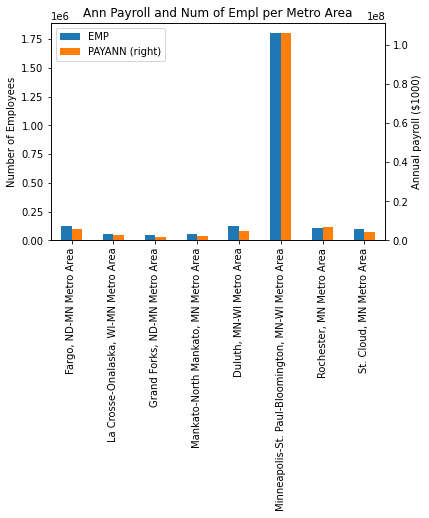

In [13]:

rev = df_1[['NAME', 'EMP', 'PAYANN']]
rev['EMP'] = pd.to_numeric(rev['EMP'])
rev.set_index("NAME",drop=True,inplace=True)
rev['PAYANN'] = pd.to_numeric(rev['PAYANN'])
ax = rev.plot(title = 'Ann Payroll and Num of Empl per Metro Area', secondary_y='PAYANN', kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Number of Employees')
ax.right_ax.set_ylabel('Annual payroll ($1000)')
plt.show()

In [14]:
# Clustered Bar:



# columns03 = df03[['SEX_LABEL', 'EMP', 'PAYANN']]
# columns03['EMP'] = pd.to_numeric(columns03['EMP'])
# columns03['PAYANN'] = pd.to_numeric(columns03['PAYANN'])
# ax03 = columns03.plot(x='SEX_LABEL',y=['EMP','PAYANN'],kind='bar')
# ax03.set_xlabel('Sex')
# ax03.set_ylabel('Number of employees')
# plt.show()